In [26]:
%matplotlib inline
import numpy
import math
import sympy as sp
import matplotlib.pyplot as plt


In [28]:
def f(t, u):
    return numpy.array([u[1], u[2], 4.0 * t**2 + 8.0 * t -10.0 - 4.0 * u[0] - 4.0 * u[1] - u[2]])
def solve_AB4(N, eta):
    ### INSERT CODE HERE
    """This function takes as arguments the number of time points N and initial condition,
    return the vector of time points t and the solution u_ab4.
    
    Input:
    -N: the number of time points N (which includes the initial time and final time)
    -eta: the initial condition
    
    Output:
    -t: the vector of time points
    -u_ab4: the solution
    """

    t = numpy.linspace(0.0, 10, N)
    delta_t = t[1] - t[0]
    u_ab4 = numpy.empty((3, N))
    u_ab4[:, 0] = eta

    #RK4 start the method
    for (n, t_n) in enumerate(t[0:3]):
        y_1 = u_ab4[:, n]
        y_2 = u_ab4[:, n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_1)
        y_3 = u_ab4[:, n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_2)
        y_4 = u_ab4[:, n] + delta_t * f(t_n + 0.5 * delta_t, y_3)
        u_ab4[:, n+1] = u_ab4[:, n] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))

    #4 step Adams-Bashforth
    for n in xrange(0,len(t)-4):
        u_ab4[:, n+4] = u_ab4[:, n + 3] + delta_t * (-9.0*f(t[n], u_ab4[:, n]) + 37.0 * f(t[n+1], u_ab4[:, n+1]) - 59.0*f(t[n+2], u_ab4[:, n+2]) + 55.0*f(t[n+3], u_ab4[:, n+3])) / 24.0 
    
    return t, u_ab4

In [29]:
def f(t, u):
    return numpy.array([u[1], u[2], 4.0 * t**2 + 8.0 * t -10.0 - 4.0 * u[0] - 4.0 * u[1] - u[2]])
def solve_ABM3(N, eta):
    """This function takes as arguments the number of time points N and initial condition,
    return the vector of time points t and the solution u_abm3.
    
    Input:
    -N: the number of time points N (which includes the initial time and final time)
    -eta: the initial condition
    
    Output:
    -t: the vector of time points
    -u_abm3: the solution
    """
    
    t = numpy.linspace(0, 10, N)
    delta_t = t[1] - t[0]
    u_abm3 = numpy.empty((3, N))

    # Use RK-4 to start the method
    u_abm3[:, 0] = eta
    
    for (n, t_n) in enumerate(t[0:2]):
        y_1 = u_abm3[:, n]
        y_2 = u_abm3[:, n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_1)
        y_3 = u_abm3[:, n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_2)
        y_4 = u_abm3[:, n] + delta_t * f(t_n + 0.5 * delta_t, y_3)
        u_abm3[:, n+1] = u_abm3[:, n] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))


    for n in xrange(0,N-3):
        #3-step AB as the predictor
        u_abm3[:, n+3] = u_abm3[:, n + 2] + delta_t / 12.0 * (5.0*f(t[n], u_abm3[:, n]) - 16.0 * f(t[n+1], u_abm3[:, n+1]) + 23.0 * f(t[n+2], u_abm3[:, n+2]))
        #3-step AM as the corrector
        u_abm3[:, n+3] = u_abm3[:, n + 2] + delta_t / 24.0 * (f(t[n], u_abm3[:, n]) - 5.0 * f(t[n+1], u_abm3[:, n+1]) + 19.0 * f(t[n+2], u_abm3[:, n+2]) + 9.0 * f(t[n+3], u_abm3[:, n+3]))

    return t, u_abm3

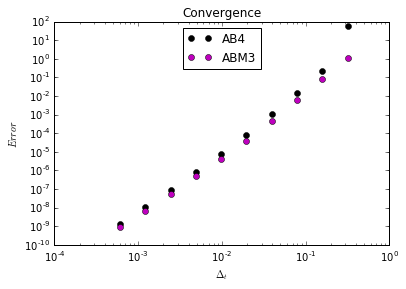

In [30]:
### INSERT CODE HERE

num_steps = [2**n for n in xrange (5,15)]

delta_t=numpy.empty(len(num_steps))
error_1=numpy.empty(len(num_steps))
error_2=numpy.empty(len(num_steps))

fig = plt.figure() 
axes = fig.add_subplot(1, 1, 1)

for (i, N) in enumerate(num_steps):
    t = numpy.linspace(0, 10.0, N)
    delta_t[i] = t[1] - t[0]
    u_exact = lambda t:-numpy.sin(2.0*t)+ t**2.0 - 3.0
    
    t, U = solve_AB4(N, [-3.0, -2.0, 2.0])
    AB4=U[0, :]
    error_1[i] = numpy.linalg.norm((delta_t[i]*(AB4-u_exact(t))),ord=1)
    
    t, U = solve_ABM3(N, [-3.0, -2.0, 2.0])
    ABM3=U[0, :]
    error_2[i] = numpy.linalg.norm((delta_t[i]*(ABM3-u_exact(t))),ord=1)
    

axes.loglog(delta_t, error_1, 'ko', label='AB4')
axes.loglog(delta_t, error_2, 'mo', label='ABM3')
axes.set_title("Convergence")
axes.set_xlabel("$\Delta_t$")
axes.set_ylabel("$Error$")
axes.legend(loc=9)

plt.show()

In [25]:
A = numpy.matrix([[4, 12, -16], [12, 37, -43], [-16, -43, 98]])
R = cholesky_factorization(A)
# R_n = numpy.linalg.cholesky(A).transpose()
# R = cholesky_factorization(A)
# numpy.testing.assert_allclose(R_n, R)
# print "Success!"

[[ 2  6 -8]
 [ 0  1  5]
 [ 0  0  3]]


Using the general expansion and evalution of the Taylor series about $t_n$ we have
$$\begin{aligned}
    u(t_{n+j}) &= u(t_n) + j \Delta t u'(t_n) + \frac{1}{2} (j \Delta t)^2 u''(t_n) + \frac{1}{6} (j \Delta t)^3 u'''(t_n)+ \mathcal{O}(\Delta t^4) \\
    u'(t_{n+j}) &= u'(t_n) + j \Delta t u''(t_n) + \frac{1}{2} (j \Delta t)^2 u'''(t_n) + \mathcal{O}(\Delta t^3)
\end{aligned}$$
leading to
$$\begin{aligned}
    T(t, u; \Delta t) = \frac{1}{\Delta t}\left( \sum^r_{j=0} \alpha_j\right) u_{n+j} + \left(\sum^r_{j=0} (j\alpha_j - \beta_j)\right) u'(t_n) + \Delta t \left(\sum^r_{j=0} \left (\frac{1}{2}j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) + \Delta t^2 \left(\sum^r_{j=0} \left (\frac{1}{6}j^3 \alpha_j - \frac{1}{2} j^2 \beta_j \right) \right) u'''(t_n) + \cdots
\end{aligned}$$
The method is *consistent* if the first two terms of the expansion vanish

i.e. $\sum^r_{j=0} \alpha_j = 0$ and $\sum^r_{j=0} j \alpha_j = \sum^r_{j=0} \beta_j$ and $\sum^r_{j=0} \frac{1}{2} j^2 \alpha_j = \sum^r_{j=0} j \beta_j$ and $\sum^r_{j=0} \frac{1}{6} j^3 \alpha_j = \sum^r_{j=0}\frac{1}{2} j^2 \beta_j$
$$Given~\alpha_0 = 0, \alpha_1 = -1, and~\alpha_2 = 1$$
$$\alpha_0 + \alpha_1 + \alpha_2 = 0$$
$$0 * \alpha_0 + 1 * \alpha_1 + 2 * \alpha_2 = \beta_0 + \beta_1 + \beta_2$$
$$\frac{1}{2} * 0 * \alpha_0 + \frac{1}{2} * 1 * \alpha_1 + \frac{1}{2} * 2 * \alpha_2 = 0 * \beta_0 + 1 * \beta_1 + 2* \beta_2$$
$$\frac{1}{6} * 0 * \alpha_0 + \frac{1}{6} * 1 * \alpha_1 + \frac{1}{6} * 8 * \alpha_2 = 0 * \beta_0 + \frac{1}{2} * \beta_1 + 2* \beta_2$$
$$Solve~above~equation~set$$
$$\beta_0=-\frac{1}{12},\beta_1=\frac{2}{3}=\frac{8}{12},\beta_2=\frac{5}{12}$$

In [ ]:
1.0/1 - 1.0/2 + 1.0/2 - 1.0/3 + 1.0/3 -1.0/4 +1.0/4 - 1.0/5 + 1.0/5 - 1.0/6 + 1.0/6 - 1.0/7+ 1.0/7 - 1.0/8 + 1.0/8 - 1.0/9 + 1.0/9 - 1.0/10 + 1.0/10 - 1.0/11

In [ ]:
import scipy.misc as misc
import sympy
x = 2.0
#f = sympy.symbols('f', cls=sympy.Function)
f = sympy.exp(x)
b = f.series(x0=0, n=1000)

print b
print f
print 10000000000000000000000000000*(b-f)

In [ ]:
l = []
for n in xrange(1, 5):
    coefficient = 1.0 / misc.factorial(n)
    l.append(coefficient)
reversed_l = l[::-1]
print l
print reversed_l

In [ ]:
import sympy
import scipy.misc as misc
def lamda(x):
    n = 1
    Tn = 1
    while n <= 100:
        Tn = Tn + x**n/misc.factorial(n)
        if np.exp(x) - Tn < 0.000009:
            return n, Tn
        else:
            n = n + 1
    else:
        print x
        
    
lamda(3)
        

In [ ]:
# import numpy
# import matplotlib.pyplot as plt
# x = numpy.linspace(-1, 1, 100)
# T_N = 1.0 + x + x**2 / 2.0
# R_N = numpy.exp(1.0) * x**3 / 6.0

# plt.plot(x, T_N, 'r', x, numpy.exp(x), 'k', x, R_N, 'b')
# plt.title("Taylor Polynomial and Residual for $N=2$")
# plt.xlabel("x")
# plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")
# plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=2)
# plt.show()

In [ ]:
# N = numpy.array([10**n for n in xrange(1, 8)])
# S_1 = []
# for (n, upper_bound) in enumerate(N):
#     S_1.append(numpy.sum((1.0/i) - (1.0/(i + 1)) for i in xrange(1, upper_bound + 1)))
# return S_1

# #Get the list of right side results
# N = numpy.array([10**n for n in xrange(1, 8)])
# S_2 = []
# for (n, upper_bound) in enumerate(N):
#     S_2.append(numpy.sum((1.0/i) - (1.0/(i + 1)) for i in xrange(1, upper_bound + 1)))
# return S_2

# absolute_error = numpy.substract(S_1, S_2)


In [ ]:
import scipy.misc as misc
a = np.log(misc.factorial(10.0))
b = 10.0 * np.log(10.0) - 10.0
print a, b, a-b, (a - b)/a

In [ ]:
a = np.exp(1)
b = 2.71827876984127
print a, b, a - b, (a - b)/a

In [ ]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)


# def rel_error(N):
#     """rel_error returns relative error corresponding to N
#     """
#     rel_error = numpy.absolute(abs_error(N)/sum_1(N))
#     return rel_error
#rel_error = numpy.absolute(abs_error(N)/sum_1(N))

x = np.linspace(10, 10**7, 1000)

#f_hat = (numpy.exp(x + delta_x) - numpy.exp(x)) / (delta_x)

y = abs_error(x)

axes = fig.add_subplot(1, 1, 1)
#axes.loglog(x, y)
plt.plot(x, y)
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("Relative Error")




plt.show()

In [ ]:
epsilon = np.finfo(float).eps
print epsilon

In [ ]:
a = np.pi
b = 22.0/7.0
c = 11/7
print a, b, a - b, (a-b)/a